# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [35]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [15]:
# Your work here.
# question 1
scipy.stats.normaltest(df.temperature)

# the distribution apears to be normal as we cannot reject the null hypothesis of non-normal
# distribution given the high p-value reported by the normalization test below

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

130


(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

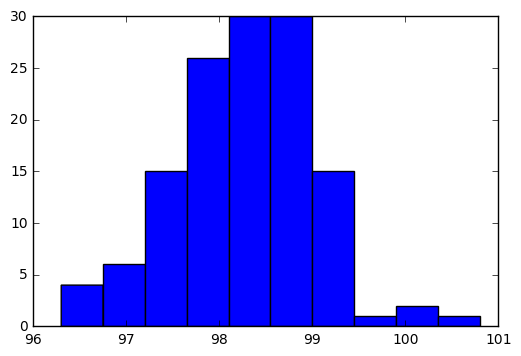

In [11]:
# question 2
print(len(df))
plt.hist(df.temperature)

# the sample size of n = 130 is NOT large
# we cannot test the independence of the observations with respect to each other but can
# assume the sample was taken randomly and observations should therefore be independent

In [16]:
# question 3
print(np.mean(df.temperature))
scipy.stats.ttest_1samp(df.temperature, 98.6)

# we should use a two-sided test because the true population mean could be higher or lower
# than our estimated
# though the sample n > 30, we do not know the population standard deviation, so it is
# appropriate to use the z-statistic the two-sided t-test indicates we can reject the null hypothesis (that the difference between
# the sample mean and the population mean is zero). this means that, given our sample,
# we cannot conclude that the true population mean is 98.6 degrees


98.24923076923078


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [30]:
import statsmodels.stats.weightstats
statsmodels.stats.weightstats.ztest(df.temperature, x2 = None)
# the z statistic also shows a low p-value indicating we cannot reject the null

(1527.8768644603886, 0.0)

In [41]:
# question 4
sd = scipy.stats.sem(df.temperature)
mean = np.mean(df.temperature)
print(mean - sd, mean + sd)
print(mean - (2*sd), mean + (2*sd))

98.1849263524 98.3135351861
98.1206219356 98.3778396029


In [38]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h
print(mean_confidence_interval(df.temperature))
print(scipy.stats.sem(df.temperature))

(98.249230769230749, 98.122002905608014, 98.376458632853485)
0.0643044168379


In [40]:
sd

0.7303577789050377

we should consider someone's temperature to be abnormal when it is 1 or 2 standard
errors from the observed mean. a temperature over 99 or under 98 should both be
considered abnormal.

In [52]:
# question 5
male = df[df.gender == 'M']
female = df[df.gender == 'F']
print(scipy.mean(male.temperature),scipy.mean(female.temperature))
print(scipy.stats.ttest_ind(male.temperature, female.temperature))

98.1046153846154 98.39384615384613
Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


we run a t-test of two population means of independent samples. 
the resulting p-value indicates we can reject the null hypothesis that the two means are equal, meaning we find that there is a statistically significant difference in male and female body temperatures in the sample.
while 
